$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
$$

In [115]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt;

# scientific
import numpy as np;
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.kernel_ridge import KernelRidge

# math
from __future__ import division


# EECS 545:  Machine Learning
## Lecture 08:  Kernel Methods
* Instructor:  **Jacob Abernethy**
* Date:  February 8, 2016


# Outline

* Kernel methods: Motivation
* Kernel functions
* Kernel trick
* Dual representations
    - Example: linear regression
* Constructing kernels
* Kernel regression

## Linear Regression

* Example: Polynomial Regression 
Relationship between the independent variable $ x$ and the dependent variable $ y$ is modeled as an $ n^{th}$ degree polynomial. 

1-D Regression: One input $ x$, one output $ y(x)$
- $ y(x) = w^T x $ can only produce straight lines through origin.
- Not very flexible or powerful


** How to deal with this?? **

## Feature Maps

Replace $ x$ by $(1,x) $

Replace $ x$ by $(1,x, x^2, x^3) $

Replace $ x$ by $(1,x, x^2, x^3, x^4, x^5) $

In [63]:
# actual function to be approximated: sin(x)
def f(x): 
    return np.sin(x)


# generate points to plot
x_plot = np.linspace(0, 5, 100)

# generate random data points
x = np.linspace(0, 5, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]


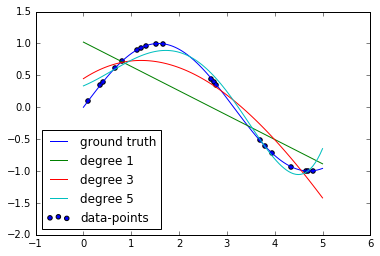

In [64]:
plt.plot(x_plot, f(x_plot), label="ground truth")
plt.scatter(x, y, label="data-points")

# Polynomial-regression for degree 1,3 and 5
for degree in [1, 3, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='lower left')
plt.show()

## Linear regression with (nonlinear) features

* Linear Regression Model 
$$ y(x,w) = w^T \phi (x) = \sum_{j=0}^{M} w_j \cdot \phi_j(x) $$

* Least-squares with L-2 regularization
$$ J(w) = \frac{1}{2} \sum_{n=1}^{N}(w^T \phi (x_n) - t_n)^2 + \frac{\lambda}{2}w^Tw $$

* Closed-form Solution
$$ w = (\phi^T \phi + \lambda I)^{-1}\phi^T \cdot t $$


## How do I use this?

* What is $\phi$? What features to use?

* Computational Complexity
    - $\phi : N \times M $ matrix where N is number of examples, M is number of features
    - Need to invert $\phi^T\phi$ which is size $M \times M$
    - Computational complexity of the order $M^3$

## Linear Classifiers

* No linear separating plane

* Not very powerful

* Is it possible to do better?

<img src="linear_classifier.png" width=300px, align="middle">

## Linear classifiers with nonlinear features

* Add distance to origin $(x_1^2 + x_2^2)^\frac{1}{2}$ as third feature.

* Data now lives in a parabolic surface in 3D.

* Linear Separation in 3D feature space.

* In original feature space, decision boundary is an ellipse.

<img src="linear_classifier_3d.png" width=300px, align="middle">

* Another way is to replace $(x_1, x_2) \rightarrow (x_1^2, x_2^2)$

* Different tricks with features help make problem solvable by using linear methods.

## Linear Separability of data

In [128]:
# Data Points
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

# Creating feature vector and label vector 
X = np.array([[1,2], [5,8], [1.5,1.8], [8,8], [1,0.6], [9,11]])
t = [0,1,0,1,0,1]

# Classifier
clf = svm.SVC(kernel='linear', C = 1.0)

# Fitting the data
clf.fit(X,t)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



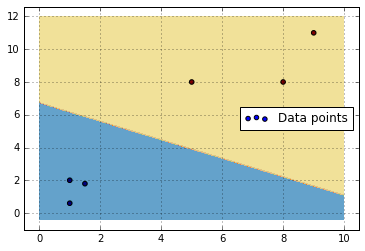

In [129]:
# Plotting
plt.scatter(x,y, label = "Data points")
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = t)
plt.grid(); plt.legend(loc = 'center right'); plt.show()

In [132]:
# Non-Separable Data Points
x = [0, 1, -1, 0, 5, -5]
y = [1, -1, -1, 5, -5, -5]

# Creating feature vector and label vector 
X = np.array([[0,1], [1,-1], [-1,-1], [0,5], [5,-5], [-5,-5]])
t = [0,0,0,1,1,1]

# Classifier
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

# Fit the data
rbf_svc = clf.fit(X, t)

# linear fit
svc = svm.SVC(kernel='linear', C=1.0).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

titles = ['linear classifier',
          'Non-linear classifier']

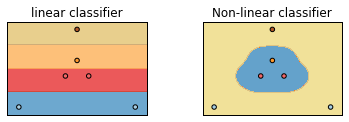

In [135]:
# Plotting
for i, clf in enumerate((svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
    plt.xticks(());plt.yticks(()); plt.title(titles[i])

plt.grid(); plt.show()


* Data is mapped to a new, higher (possibly infinite) dimensional space.




* An alternative way to think is that the data is still in its original space, but the definition of the **distance metric** or **inner product** has changed.

* $\phi(x)$ is the feature vector to which data point $x$ is mapped onto. 
    - It extracts out important properties if $x$.
    - e.g. polynomial combinations of the original features, upto some order.
    - makes regression/classification problems easier in some cases.
    
    
* But it comes at a price!!
    - It may be very high dimensional, possibly infinite dimensional (try computing that!).
    - Computational complexity blows up.

## Kernels to the rescue (kernel trick)

* As we shall see, most ML algorithms depend upon the data points through their pairwise **inner products**. 


* These inner products can be efficiently computed using kernels. This is popularly known as **Kernel trick**. 

## Kernel Functions

* A kernel function $\kappa(x,x’)$ is intended to represent the similarity between $x$ and $x’$.


* A popular way to express similarity is as the inner product of feature vectors:
$$ \kappa(x, x') = \phi(x)^T \phi(x')^T $$


* We define a kernel function $\kappa(x,x’)$ as one that can be expressed as an inner product, but we may not need to compute it that way.

## Example: 2D input data

* Inner product between two vectors $x :=(x_1, x_2)$ and $z:=(z_1, z_2)$:
$$ \kappa(x,z) = x^T z = x_1z_1 + x_2z_2 $$
    
* Let’s replace this by its square:
$$
\begin{align}
\kappa(x,z) 
&= (x^T z)^2 = (x_1z_1 + x_2z_2)^2 \\
&= x_1^2z_1^2 + 2x_1z_1x_2z_2 + x_2^2z_2^2 
\end{align}
$$



* This is same as the inner product between $(x_1^2, \sqrt2 x_1x_2, x_2^2)$ and $(z_1^2, \sqrt2 z_1z_2, z_2^2)$
    - or between $(x_1^2, x_1x_2, x_1x_2, x_2^2)$ and $(z_1^2, z_1z_2, z_1z_2, z_2^2)$.
    - So, it's not unique.

* Consider higher-order polynomial of degree p:
$$ \kappa(x,z) = (x^Tz)^p = (\sum_{i=1}^{M}x_iz_i)^p $$


* Feature mapping: 
    $$ \phi(x) = \Big[..., {p \choose j_1,j_2... j_M}^\frac{1}{2}(x_1)^{j_1} ... (x_M)^{j_M} , ...\Big] $$
    - all monomials of degree $p$

* Inhomogeneous polynomial up to degree p:
$$ k(x,z) = (x^Tz + c)^p = (c + \sum_{i=1}^{M}x_iz_i)^p , c>0 $$


* Feature mapping:  all monomials of degree $\leq p$

## Example: handwritten digits images


* Take the pixel values and compute $\kappa(x,z) = (x^Tz + 1)^p $

here, $x$ = $28 \times 28 = 784$ pixels  
<img src="hand_writ_example.png" width=100px, align="middle">

* You can compute the inner product in the space of all monomials up to degree $p$ (for $dim(x)=784$ and $p=4$ a $16G$ dimensional space!)

## Kernel trick 

* By using different definitions for inner product, we can compute inner products in a high dimensional space, with only the computational complexity of a low dimensional space.


* Many algorithms can be expressed completely in terms of kernels $\kappa(x,x’)$, rather than other operations on $x$.


* In this case, you can replace one kernel with another, and get a new algorithm that works over a different domain.


## Dual Representation and Kernel Trick

* The dual representation, and its solutions, are entirely written in terms of kernels.


* The elements of the Gram matrix  $ K =\Phi \Phi^T $
$$ K_{ij} = \kappa(x_i, x_j) = \phi(x_i)^T \phi(x_j) $$


* These represent the pairwise similarities among all the observed feature vectors.
    - We may be able to compute the kernels more efficiently than the feature vectors.

## Kernel substitution

* To use the kernel trick, we must formulate (training and test) algorithms purely in terms of inner products between data points


* We can not access the coordinates of points in the high-dimensional feature space


* This seems a huge limitation, but it turns out that quite a lot can be done

## Example: distance

* Distance between samples can be expressed in inner products:
$$
\begin{align}
||\phi(x) - \phi(z) ||^2
&= \langle\phi(x)- \phi(z), \phi(x)- \phi(z) \rangle\\
&= \langle \phi(x), \phi(x)\rangle - 2\langle\phi(x), \phi(z)\rangle + \langle\phi(z), \phi(z) \rangle \\
&= \kappa(x,x) - 2\kappa(x,z) + \kappa(z,z)
\end{align}
$$



* So nothing stops you from doing k-nearest neighbor searches in high dimensional spaces (Phew!!)

## Example: mean

* Can you determine the mean of data in the mapped feature space through kernel operations only?


* A: No, you cannot compute any point explicitly

## Example: distance to the mean

* Mean of data points given by: $\phi(s) = \frac{1}{N}\sum_{i=1}^{N}\phi(x_i)$


* Distance to the mean:
$$
\begin{align}
||\phi(x) - \phi_s ||^2
&= \langle\phi(x)- \phi_s, \phi(x)- \phi_s \rangle\\
&= \langle \phi(x), \phi(x)\rangle - 2\langle\phi(x), \phi_s\rangle + \langle\phi_s, \phi_s \rangle \\
&= \kappa(x,x) - \frac{2}{N}\sum_{i=1}^{N}\kappa(x,x_i) + \frac{1}{N^2}\sum_{j=1}^{N}\sum_{i=1}^{N}\kappa(x_i,x_j)
\end{align}
$$


## Dual Representations for linear regression

* Recall regression problems with error function
$$ J(w) = \frac{1}{2} \sum_{n=1}^{N}(w^T \phi (x_n) - t_n)^2 + \frac{\lambda}{2}w^Tw $$


* $J(w)$ is minimized at 
$$ w_{ML} = (\Phi^T \Phi + \lambda I)^{-1}\Phi^T \cdot t $$


* Recall the N x M design matrix that is central to this solution.


* We can approach the solution a different way 

## Recap: The Design Matrix

* The design matrix is an NxM matrix, applying 
    - the M basis functions (M: number of columns) 
    - to N data points (N: number of rows)


$$
\Phi = \left\{
\begin{array}{cccc} 
\phi_0(x_1) & \phi_1(x_1) & ... & \phi_{M-1}(x_1)  \\ 
\phi_0(x_2) & \phi_1(x_2) & ... & \phi_{M-1}(x_2)  \\
. & . & ... & .  \\
. & . & ... & .  \\
. & . & ... & .  \\
\phi_0(x_N) & \phi_1(x_N) & ... & \phi_{M-1}(x_N)  \\
\end{array}
\right\}
$$


* $ \phi w \approx t $


## The Gram Matrix

* For regression, a key term is the MxM "covariance" matrix
$$ \Phi^T \Phi $$


* Here, we will use the NxN Gram matrix (*pairwise similarity*)
$$ K = \Phi \Phi^T $$ 


* Note that $ K_{ij} = \kappa(x_i, x_j) = \phi(x_i)^T \phi(x_j) $
encapsulates the pairwise similarities of all the data points in the training set.


* Note that kernel methods use only $ K$ , not $\Phi$.

## Dual Representations for linear regression

* Another way to minimize J(w) is
$$ w = -\frac{1}{\lambda}\sum_{n=1}^{N}\left\{w^T\phi(x_n) - t_n)\right\} \phi(x_n) \\
= \sum_{n=1}^{N}a_n\phi(x_n) = \Phi^Ta $$

where $a_n = -\frac{1}{\lambda}\left\{w^T\phi(x_n) - t_n)\right\}$



* Let $a$ be the parameter, instead of $w$.


* Transform $J(w)$ to $J(a)$ by substituting $ w = \Phi^T a$


## Dual Representations for linear regression

* Objective function
$$ J(w) = \frac{1}{2} \sum_{n=1}^{N}\left\{w^T \phi (x_n) - t_n\right\}^2 + \frac{\lambda}{2}w^Tw $$


* Substitute $w = \Phi^Ta$
$$ J(a) = \frac{1}{2}a^T\Phi\Phi^T\Phi\Phi^Ta - a\Phi\Phi^Tt + \frac{1}{2}t^Tt + \frac{\lambda}{2}a^T\Phi\Phi^Ta \\
= \frac{1}{2}a^TKKa - aKt + \frac{1}{2}t^Tt + \frac{\lambda}{2}a^TKa $$




* Solution/prediction:
$$ y(x)  = w^T\phi(x) = a^T \Phi\phi(x) = \kappa(x)^T (K+\lambda I_N)^{-1}t $$

## Dual Representations for linear regression

* Transform $J(w)$ to $J(a)$ by using $w = \phi^Ta$ and the Gram matrix $K = \Phi\Phi^T$


* Find $a$ to minimize $J(a)$: $a = (K+\lambda I_N)^{-1}t$


* For predictions (for query point/test example x):
$$ y(x)  = w^T\phi(x) = a^T \Phi\phi(x) = \mathbf{k}(x)^T (K+\lambda I_N)^{-1}t $$
where $\mathbf{k}(x)$ has elements $\kappa_n(x) = \kappa(x_n, x)$  

## Primal versus Dual

* **Primal**: $w = (\Phi^T\Phi + \lambda I_M)^{-1} \Phi^Tt $


* **Dual**: $ a = (K + \lambda I_N)^{-1}t $



* Primal: invert M by M matrix (M = dim feature space), w vector of length M
    - cheaper because usually $N > M$, but you need to explicitly construct features.
    


   
* Dual: invert N by N matrix (N = number of data points)
    - can use the kernel trick (embed into very high dimensional feature space)
    - Use kernels $\kappa(x,x’)$ to represent similarity.
    - Kernels can be defined over vectors, images, sequences, graphs, text, etc. 


## Constructing Kernels (1)

* One can do kernel engineering to create kernels for particular purposes, expressing different kinds of similarity.



* Method 1: One way is to define the feature space mapping $\phi(x)$ and then define the **inner product kernel**
$$ \kappa(x,x') = \phi(x)^T \phi(x') = \sum_{i=1}^{M}\phi_i(x) \phi_i(x') $$


* Define a kernel function directly, such as 
$$ \kappa(x,z) = (x^Tz)^2 $$


* In 2D, we can explicitly identify the feature map 
$$ \phi(x) = (x_1^2, \sqrt2 x_1x_2, x_2^2) $$
    - such that $ \kappa(x,z) = \phi(x)^T\phi(z)$


* Explicit feature mappings can be very complex.  
    - Kernels help us avoid that complexity.

## Constructing Kernels (2)

* A simpler way to test without having to construct $\phi(x)$


* Use the necessary and sufficient condition (**Mercer Theorem**) that for a function $\kappa(x,x’)$ to be a inner product (valid) kernel:
    - the Gram matrix $K$, whose elements are given by $\kappa(x_n,x_m)$, should be **positive semidefinite** for all possible choices of the data set {$x_n$}
    - i.e., $K$ is positive semidefinite:
    $$ a^TKa := \sum_{i}\sum_{j}a_iK_{ij}a_j \geq 0 \forall a \in \R^n $$ 


### Techniques for Constructing New Kernels
* There are a number of axioms that help us construct new, more complex kernels, from simpler known kernels. Several are listed in next page. Try to prove them all as an exercise.


* Check out **PRML** book (Bishop), Chapter 6.
<img src="prml.jpg" width=300px, align="middle">

* Given valid kernels $\kappa_1(x,x')$ and $\kappa_2 (x, x')$, $c > 0$ is a constant, $f (·)$ is any function, $q(·)$ is a polynomial with non-negative coefficients, $\phi(x)$ is a function from $x$ to $\R^M$ , $\kappa_3 (·,·)$ is a valid kernel in $\R^M$, $\bf{A}$ is a symmetric positive semidefinite matrix, $x_a$ and $x_b$ are variables (not necessarily disjoint) with $\bf{x} = (x_a , x_b)$, and $\kappa_a$ and $\kappa_b$ are valid kernel functions over their respective spaces. 


* The following new kernels will also be valid:
$$\kappa(x,x') = c\kappa_1(x,x')$$
$$\kappa(x,x') = f(x) \kappa_1(x,x')f(x') $$
$$\kappa(x,x') = q(\kappa_1(x,x')) $$
$$\kappa(x,x') = exp(\kappa_1(x, x')) $$
$$\kappa(x,x') = \kappa_1 (x, x' ) + \kappa_2 (x, x' ) $$
$$\kappa(x,x') = \kappa_1 (x, x' ) \kappa_2 (x, x' ) $$
$$\kappa(x,x') = \kappa_3 (\phi(x), \phi(x')) $$
$$\kappa(x,x') = \bf{x}^T \bf{A x'} $$
$$\kappa(x,x') = \kappa_a (x_a, x_a') + \kappa_b (x_b, x_b') $$
$$\kappa(x,x') = \kappa_a (x_a, x_a') \kappa_b (x_b, x_b') $$

## Most popular kernels

* Simple Polynomial Kernel (terms of degree 2)
$$\kappa(x,z) = (x^Tz)^2 $$


* Generalized Polynomial kernel - degree M
$$\kappa(x,z) = (x^Tz + c)^M, c > 0 $$


* Gaussian Kernels
$$ \kappa(x,z) = exp \left\{-\frac{||x-z||^2}{2\sigma^2} \right\} $$

## Gaussian kernel

* **Not related to Gaussian pdf**


* Translation invariant (depends only on distance between points)


* Corresponds to an infinitely dimensional space! (PRML exercise 6.11)

## Kernel regression

* Using Gaussian kernel
    - output: $\frac{\Sigma_i K(x,x^{(i)})t^{(i)}}{\Sigma_i K(x,x^{(i)})} $
    
    where $ K(x, x^{(i)}) = exp \left\{-\frac{||x- x^{(i)}||^2}{2\sigma^2} \right\} $
    
    

* More generally, any distance metric (other than L2 or Eucleidian distance) can be used.


* Also, more general types of kernel function can be used.

## Examples



In [15]:
rng = np.random.RandomState(0)

#############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0]/5))

X_plot = np.linspace(0, 5, 100000)[:, None]

#############################################################################
# Fit regression model
train_size = 100
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

#############################################################################

/home/syd/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


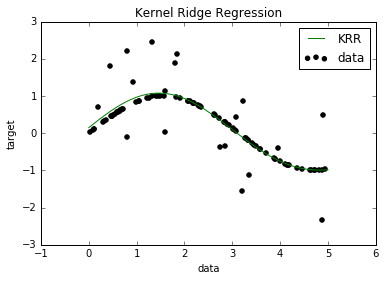

In [31]:
# plot results
plt.scatter(X[:100], y[:100], c='k', label='data')
plt.hold('on')
plt.plot(X_plot, y_kr, c='g',label='KRR')
plt.xlabel('data') 
plt.ylabel('target') 
plt.title('Kernel Ridge Regression')
plt.legend()
plt.figure()

<img src="krr_1.png" width=500px, align="middle">


<img src="krr_2.png" width=500px, align="middle">



<img src="krr_3.png" width=500px, align="middle">

## Kernel regression: Regression vs. Classification

* Note: it is very easy to formulate kernel regression into regression/classification

* Given training data $D = {x^{(i)}, t^{(i)}}$ , Kernel function $K(.,.)$  and input $x$ 

**Regression**: if $t \in \R$ , return weighted average:
$$\frac{\Sigma_i K(x,x^{(i)})t^{(i)}}{\Sigma_i K(x,x^{(i)})}$$


**Classification** if $t \in \pm 1$ , return weighted majority:
$$ sign(\Sigma_i K(x,x^{(i)})t^{(i)}) $$


## Locally-weighted Linear Regression vs. Kernel regression

* Locally-weighted linear regression

    - 1. Fit $w$ to minimize $\Sigma_i r^{(i)}(t^{(i)} - w^T\phi(x^{(i)}))^2$ 
    - 2. Output $w^T \phi(x^{(i)}) $
    
    
* Standard choice: $r^{(i)} = exp \left\{-\frac{||x- x^{(i)}||^2}{2\sigma^2} \right\}$

** Similarities **
* Both methods are “instance-based learning”.
    - Only observations (training set) close to the query point are considered (highly weighted) for regression computation.
    - Kernel determines how to assign weights to training examples (similarity to the query point x)
    - Free to choose types of kernels
    - Both can suffer when the input dimension is high.
    

In [25]:
class CreateTable(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=50%>"]
        for key, value in self.iteritems():
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

** Differences **


\begin{array}{c|c} 
\bf{Locally \hspace{0.5em} weighted \hspace{0.5em} regression} & \bf{Kernel \hspace{0.5em} regression}  \\ 
Weighted \hspace{0.5em} regression & Weighted \hspace{0.5em} mean  \\
Slow, but \hspace{0.5em} more \hspace{0.5em} accurate & Faster, but \hspace{0.5em} less \hspace{0.5em} accurate  \\
\end{array}
